# Customer Segmentation using PCA and K-Means

![Picture title](image-20220814-045127.png)

### About the dataset
Suppose we have the customer informatiomn in the membership cards of a supermarket mall. The goal of the analysis is to understand customer behaviors, so that the sense can be given to marketing team and plan the strategy accordingly.

The dataset have 5 attributes: Customer ID, age, gender, annual income and spending score (defined parameters like customer behavior and purchasing data)
link : https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
### Workflow :
1. Loading data
2. Data exlporation
3. Train/ test split
4. Prepare the data
5. Principal Component Analysis (PCA)
6. K-means clustring
7. Pipeline
8. Validate with test data


### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline   
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

### Loading data 

In [2]:
data_df=pd.read_csv('/work/Mall_Customers.csv')

In [3]:
data_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(data_df.shape)
print(data_df.info())

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Cheking for missing data

In [5]:
data_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

droping column

In [6]:
# drop Customer id 
data_df = data_df.drop('CustomerID', axis=1)
data_df.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81


### Data exlporation

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

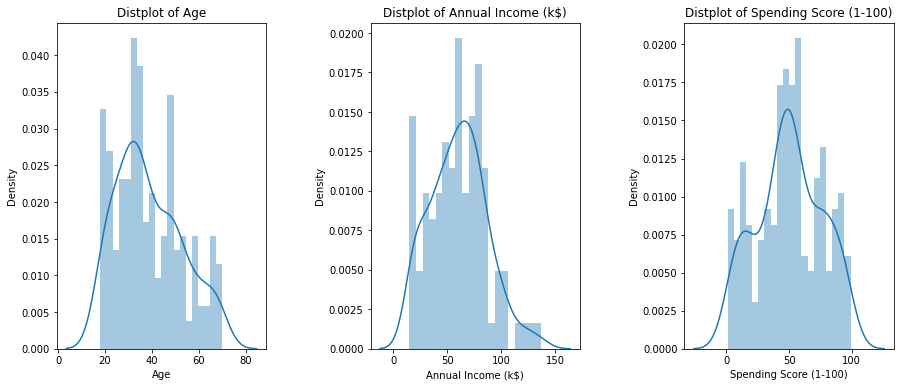

In [7]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(data_df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()


=> Age groupe of 30-40 have the highest density
=> Most of our custumors have an income of 50-80k$
=> most of our customrs have a spending score of 50

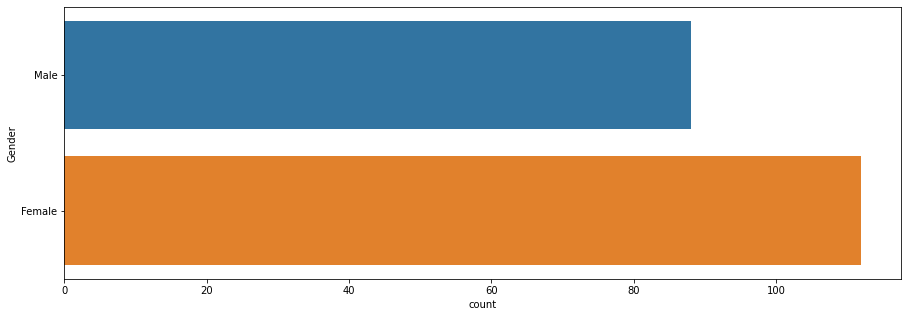

In [8]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = data_df)
plt.show()

=> 20% more of our customrs are female

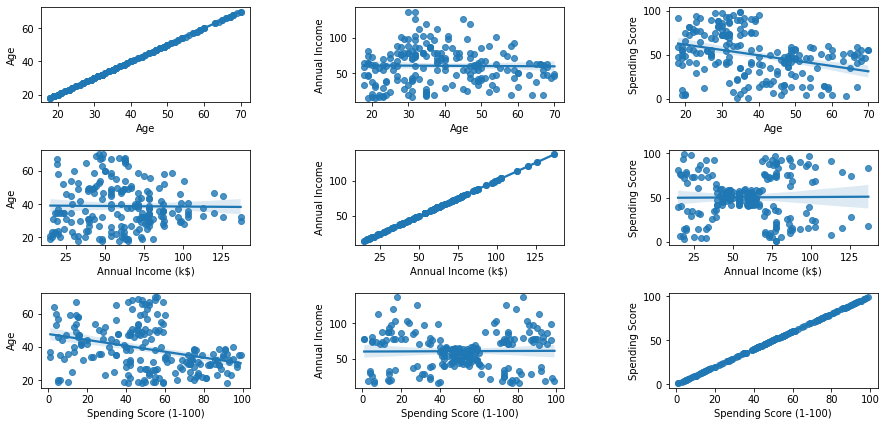

In [9]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data_df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

* Age Vs Annual income
=> 30-60 years old customers have relatively higher annual income
* Age Vs spending score
=> Under 40 years old customers have score over 60
* Annula income vs Spending score
=> We can see 5 blobs, there is no relation between the customers having annual income in the range of 20-40k and 80-140k but there is relation between customers who have annual income in the range of 40-60k.

### Train/ test split

In [10]:
train_X, test_X = train_test_split(data_df, test_size=0.2, random_state=42)

print(len(train_X), "train +", len(test_X), "test")

160 train + 40 test


In [11]:
# lets take copy of the data 
df = train_X.copy()

### Prepare the data

The following stages are:

1. Preprocessing.LabelEncoder() -normalize labels so they contain values between 0 and 1
2. StandardScaler - scaling to unit variance (ie Normalizing the data)
3. Principal Component analysis(PCA)- is an unsupervised statistical technique that is used for dimensionality reduction.
4. Feature selection.

<b> label encoder </b>

In [12]:
# Let fit and transform the Gender attribute into numeric
le = LabelEncoder()
le.fit(df.Gender)
df.loc[:,'Gender'] = le.transform(df.Gender)
df.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
79,0,49,54,42
197,1,32,126,74
38,0,36,37,26


<b>StandardScaler</b>

In [13]:
# Create scaler: scaler
scaler = StandardScaler()
scaler.fit(df)
# transform
data_scaled = scaler.transform(df)
data_scaled[0]

array([-0.87077078,  0.73027906, -0.24190423, -0.37113766])

### Principal Component Analysis (PCA)

In [14]:
pca = PCA()

# fit PCA
pca.fit(data_scaled)
# PCA features
features = range(pca.n_components_)
# PCA transformed data
data_pca = pca.transform(data_scaled)
pca.explained_variance_ratio_

array([0.33107688, 0.26720006, 0.22991261, 0.17181045])

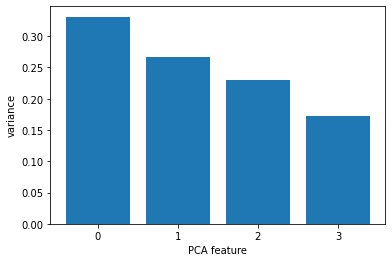

In [15]:
plt.bar(features, pca.explained_variance_ratio_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

=> as we can see 33.1% of the data corresponds to the first axis and 26.8% corresponds to the seconds we will work with 2 insintric dimensions (number of PCA features needed to approximate the dataset)

In [16]:
# Principal component analysis (PCA) and singular value decomposition (SVD) 
# PCA and SVD are closely related approaches and can be both applied to decompose any rectangular matrices.
pca2 = PCA(n_components=2, svd_solver='full')
# fit PCA
pca2.fit(data_scaled)

# PCA transformed data
data_pca2 = pca2.transform(data_scaled)
print(data_pca2.shape)

(160, 2)


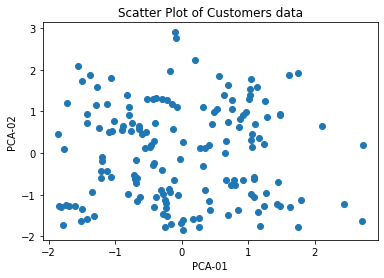

In [17]:
xs = data_pca2[:,0]
ys = data_pca2[:,1]
plt.scatter(ys, xs)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

### Determine the number of K-means clusters needed

In [18]:
#  finding elbow value for different number of clusters.
X = data_pca2
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++',random_state= 42 ) )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)    

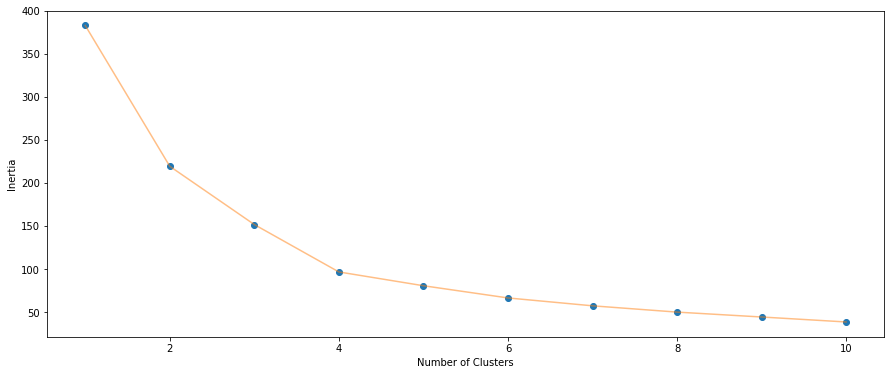

In [19]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

=> the elbow point appears to be 5

### K-means clustring

In [20]:
# KMeans model
# 5 clusters to start with
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

### Pipeline

In [21]:
# Build pipeline
pipeline = make_pipeline(scaler, pca2, kmeans)
# fit the model to the scaled dataset
model_fit = pipeline.fit(df)
model_fit

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2, svd_solver='full')),
                ('kmeans', KMeans(n_clusters=5, random_state=0))])

<b> assign labels <b>

In [22]:
# return a label for each data point based on their cluster
labels = model_fit.predict(df)
train_X['Clusters'] = labels

In [23]:
# Number of data points for each feature in each cluster
train_X.groupby('Clusters').count()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,,
0,43,43,43,43
1,24,24,24,24
2,37,37,37,37
3,38,38,38,38
4,18,18,18,18


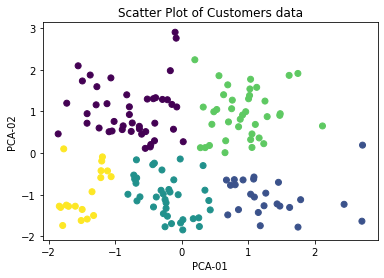

In [24]:
# Scatter plot visuals with labels

xs = data_pca2[:,0]
ys = data_pca2[:,1]
#zs = train_X.iloc[:,2]
plt.scatter(ys, xs,c=labels)
#plt.scatter(ys, zs, c=labels)

plt.grid(False)
plt.title('Scatter Plot of Customers data')
plt.xlabel('PCA-01')
plt.ylabel('PCA-02')

plt.show()

### Validate with test data

In [25]:
# predict the labels
le.fit(test_X.Gender)

#update df2 with transformed values of gender
test_X.loc[:,'Gender'] = le.transform(test_X.Gender)

labels_test = model_fit.predict(test_X)
test_X['Clusters'] = labels_test

labels_test

array([1, 2, 3, 3, 3, 2, 4, 3, 3, 4, 0, 3, 2, 4, 3, 1, 0, 0, 3, 2, 2, 0,
       0, 0, 2, 3, 4, 0, 2, 2, 4, 0, 3, 1, 3, 3, 2, 1, 3, 0], dtype=int32)

In [26]:
# Number of data points for each feature in each cluster
test_X.groupby('Clusters').count()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,,
0,9,9,9,9
1,4,4,4,4
2,9,9,9,9
3,13,13,13,13
4,5,5,5,5


### Enfin !

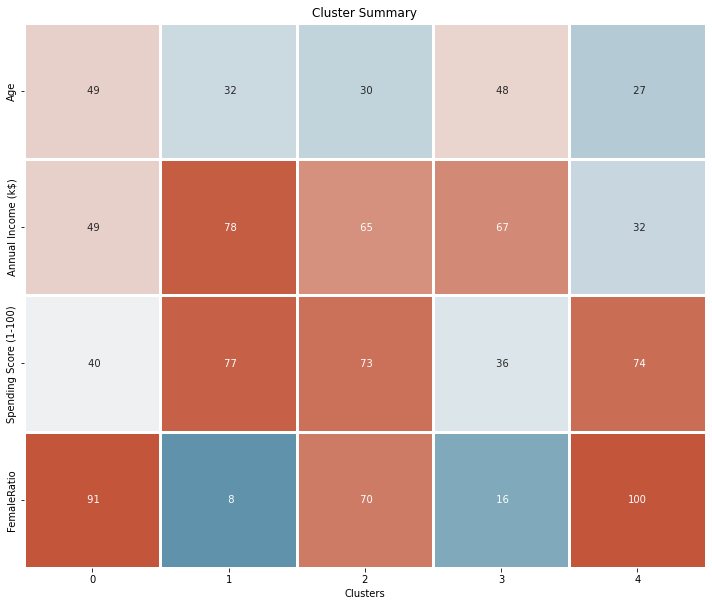

In [27]:
cluster_heatmap_df = train_X.groupby(['Clusters'])[['Age','Annual Income (k$)','Spending Score (1-100)']].median()
heatcmap = sns.diverging_palette(230, 20, as_cmap=True)
cluster_heatmap_df['FemaleRatio'] = train_X[train_X['Gender'] == 'Female'].groupby(['Clusters']).count()['Gender'] / train_X.groupby(['Clusters']).count()['Gender'] * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.heatmap(cluster_heatmap_df.T, 
    square=True,
    linewidth=3,
    vmax=80, 
    vmin=1,
    cmap=heatcmap,
    cbar=False, 
    annot=True,
    fmt='3.0f',
    ax=ax,
);

ax.set_title('Cluster Summary');
plt.tight_layout()

For the given dataset, we have segmented the customers into 5 clusters using Kmeans algorithm. Each cluster is mix of defined variables such as - gender, age, spending score and annual income.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4d8a14e9-c0d1-4f22-8c8b-9360d456168a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>